In [583]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import os

current_path=os.getcwd()

In [584]:
def A1(n):
    if n==0:
        return 1/2
    return 1j/(2*jnp.pi*n)

In [585]:
def A2(n):
    if n==0:
        return 0.5
    return -1/(jnp.pi**2*n**2)*(1-(-1)**n)

In [586]:
def A3(n):
    if n==0:
        return 2/jnp.pi
    return -2/(jnp.pi*(4*n**2-1))

In [587]:
def A4(n):
    if n==0:
        return 1/jnp.pi
    if n==2:
        return -1/(3*jnp.pi)+1j/4
    if n==-2:
        return -1/(3*jnp.pi)-1j/4
    if n==-1:
        return 2/(3*jnp.pi)+1j/4
    if n==1:
        return 2/(3*jnp.pi)-1j/4
    return (-2*(1-(-1)**n)/((n-2)*(n+2))-(1+(-1)**n)/((n-1)*(n+1)))/(2*jnp.pi)

In [588]:
def F1(x):
    return x/(2*jnp.pi)

In [589]:
def F2(x):
    condition = (x >= 0) & (x < jnp.pi)
    
    return jnp.where(condition, x / jnp.pi, 2 - x / jnp.pi)

In [590]:
def F3(x):
    return jnp.sin(x/2)

In [591]:
def F4(x):
    condition= (x>=0) & (x<jnp.pi)
    return jnp.where(condition, jnp.sin(x),-jnp.sin(2*x))

In [592]:
transforms=[A1,A2,A3,A4]
functions=[F1,F2,F3,F4]
X=jnp.linspace(0,2*jnp.pi,100)
m_wavenumber=100
wavenumbers=[i for i in range(-m_wavenumber,m_wavenumber+1)]

In [593]:
coefficients=[]
for (i,transform) in enumerate(transforms):
    coefficients.append([])
    for (j,wavenumber) in enumerate(wavenumbers):
        coefficients[-1].append(transform(wavenumber))

In [594]:
coefficients=jnp.array(coefficients).T
coefficients.shape

(201, 4)

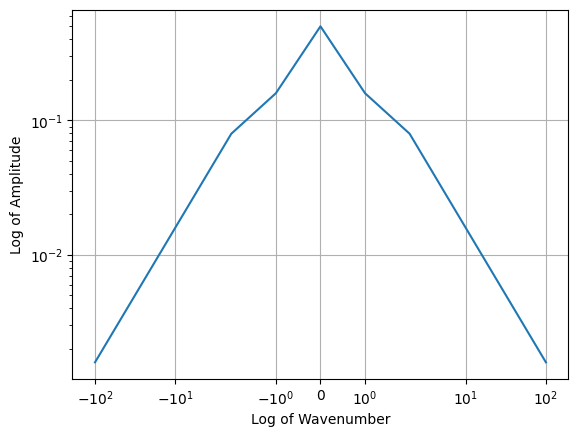

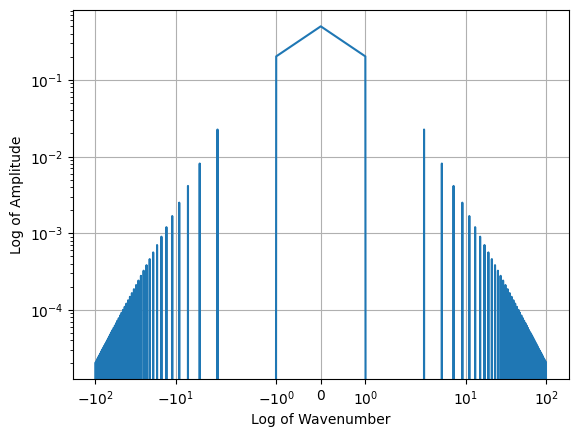

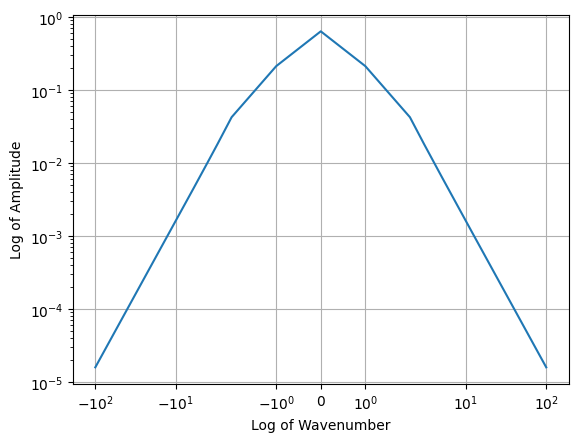

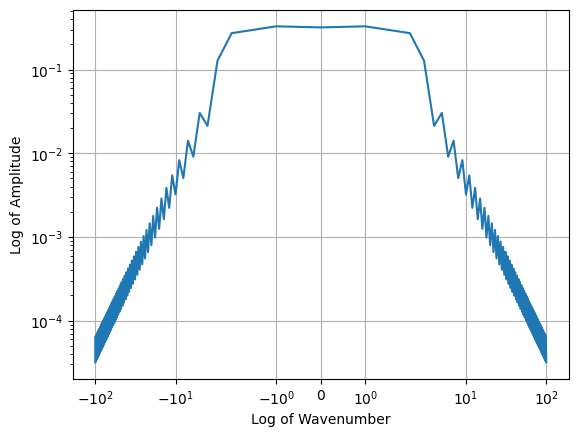

In [595]:
for i in range(coefficients.shape[-1]):
    amplitude=jnp.abs(coefficients[:,i])
    fig,ax=plt.subplots()
    plt.plot(wavenumbers,amplitude)
    ax.set_xscale('symlog')
    ax.set_yscale('log')
    ax.set_xlabel('Log of Wavenumber')
    ax.set_ylabel('Log of Amplitude')
    plt.grid()
    plt.savefig(current_path+f'/Func{i+1}/fourier_spec_a{i+1}.png')
    plt.show()

In [596]:
def inv_fourier(A,max_k,x):
    e_inx=jnp.array([jnp.exp(1j*n*x) for n in range(-max_k,max_k+1)])
    return e_inx@(A[m_wavenumber-max_k:m_wavenumber+max_k+1])

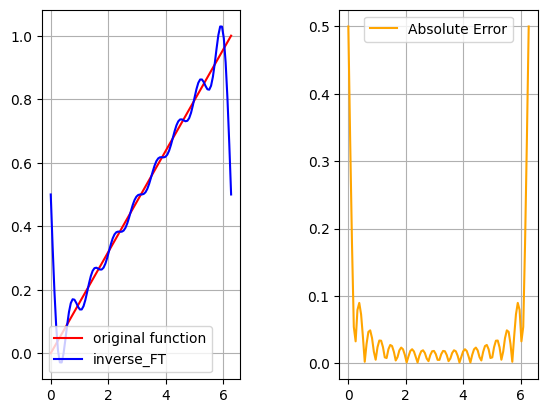

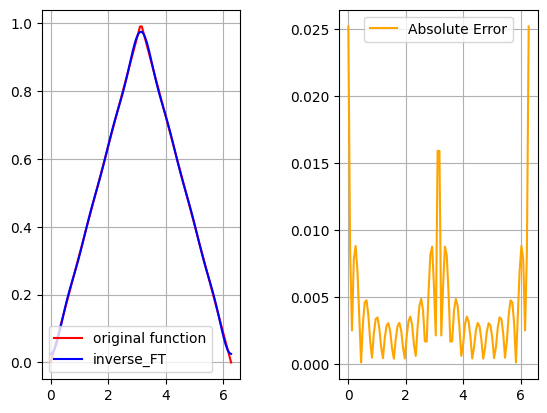

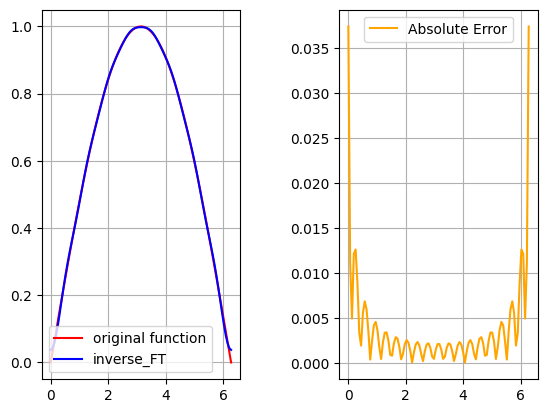

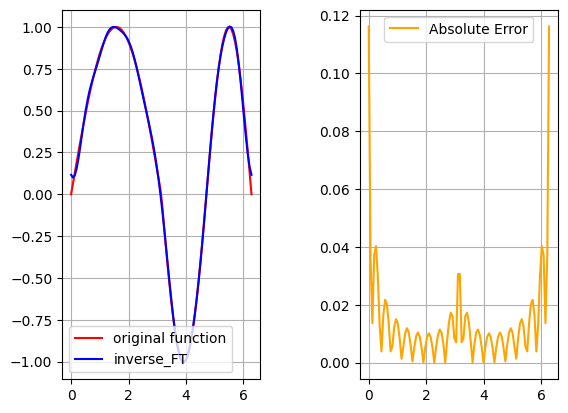

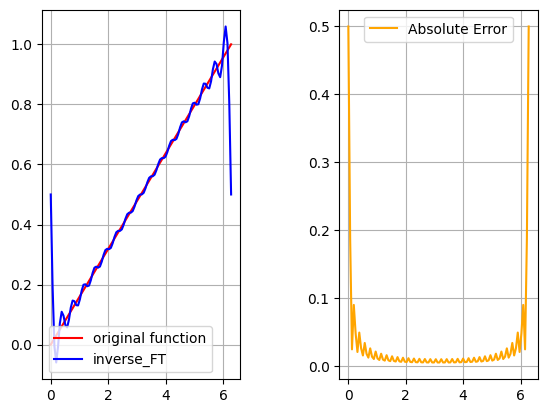

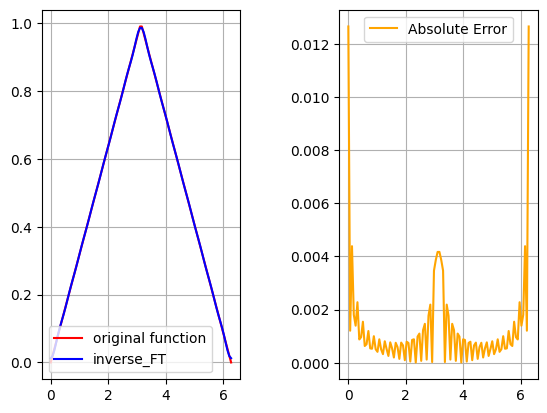

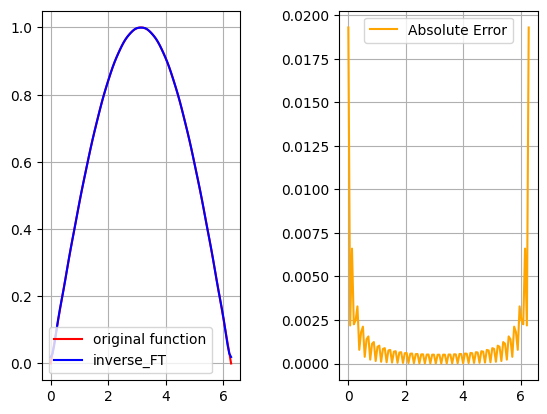

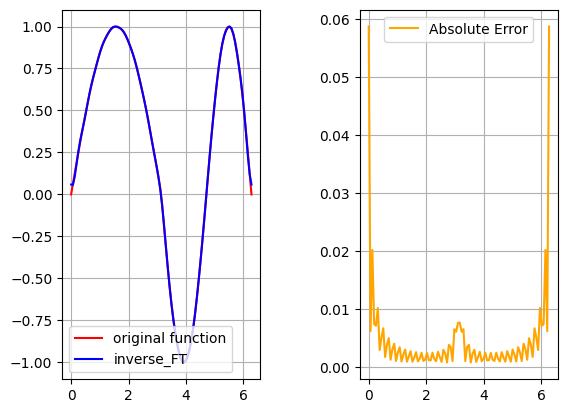

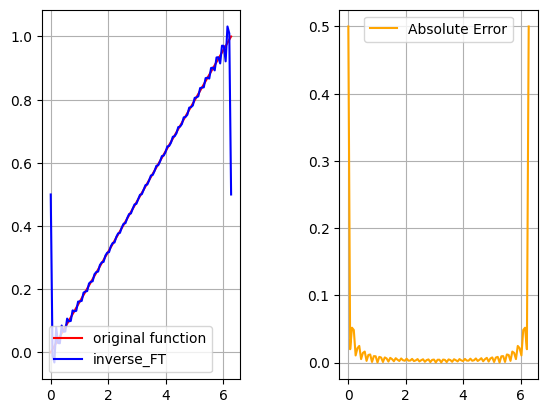

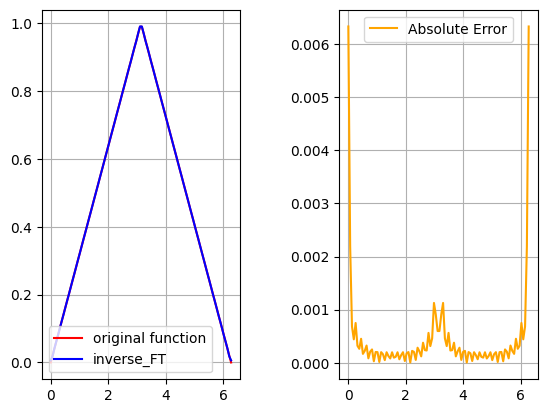

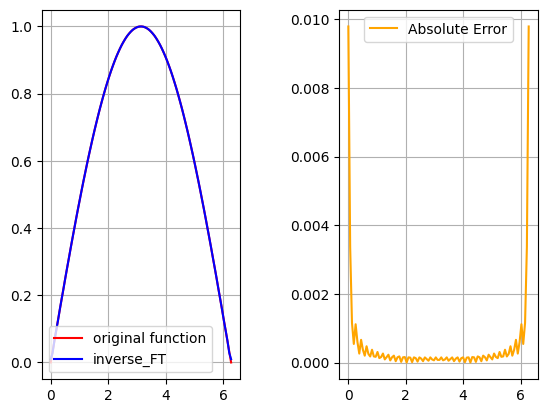

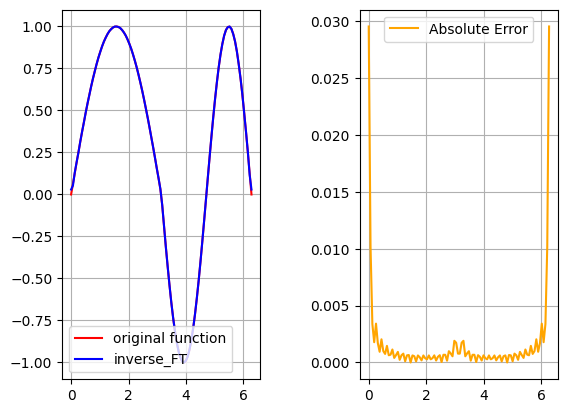

In [597]:
for max_k in [8,16,32]:
    res=jax.vmap(lambda x: inv_fourier(coefficients,max_k,x))(X)
    for i,F in enumerate(functions):
        fig,(ax0,ax1)=plt.subplots(ncols=2,)
        fig.subplots_adjust(wspace=0.5)
        ground_truth=F(X)
        inverse_FT=jnp.real(res[:,i])
        
        ax0.plot(X,ground_truth,label='original function',color='red')
        ax0.plot(X,inverse_FT,label='inverse_FT',color='blue')
        
        ax1.plot(X,jnp.abs(inverse_FT-ground_truth),label='Absolute Error',color='orange')
        
        ax0.legend(loc='lower left')
        ax0.grid()
        
        ax1.legend()
        ax1.grid()
        
        plt.savefig(current_path+f'/Func{i+1}/Comparison_b{i+1}_k={max_k}')
        plt.show()